In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('house_prices.csv')
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


In [3]:
df['intercept'] =  1

lm = sm.OLS(df['price'], df[['intercept', 'bathrooms', 'bedrooms', 'area']]) # add only quantitative x variables 
results = lm.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Sun, 23 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:33:31   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
# create an X matrix with the variable proportions

X = df[['intercept', 'bathrooms', 'bedrooms', 'area']] 
y = df['price']

# can find the optimal \betaβ estimates by calculating through closed form solution

np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(),X)),X.transpose()),y)

array([10072.10704673,  7345.3917137 , -2925.80632467,   345.91101884])

In [8]:
# Dummy Variables for Categorical Data

df[['A', 'B', 'C']] = pd.get_dummies(df['neighborhood'])
df[['lodge', 'ranch', 'victorian']] = pd.get_dummies(df['style'])

df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,intercept,A,B,C,lodge,ranch,victorian
0,1112,B,1188,3,2,ranch,598291,1,0,1,0,0,1,0
1,491,B,3512,5,3,victorian,1744259,1,0,1,0,0,0,1
2,5952,B,1134,3,2,ranch,571669,1,0,1,0,0,1,0
3,3525,A,1940,4,2,ranch,493675,1,1,0,0,0,1,0
4,5108,B,2208,6,4,victorian,1101539,1,0,1,0,0,0,1


In [9]:
# MLR now with categorical variables

df['intercept'] =  1

lm = sm.OLS(df['price'], df[['intercept', 'lodge', 'ranch']]) # add only quantitative x variables 
results = lm.fit()
results.summary()

# intercept shows that if home is victorian, predict price to be 1.046 mil, lodge is 741k less, ranch is 471k less
# need to compare to baseline category

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     1548.
Date:                Sun, 23 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:03:52   Log-Likelihood:                -86683.
No. Observations:                6028   AIC:                         1.734e+05
Df Residuals:                    6025   BIC:                         1.734e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.046e+06   7775.607    134.534      0.000    1.03e+06    1.06e+06
lodge      -7.411e+05   1.44e+04    -51.396      0.000   -7.69e+05   -7.13e+05
ranch       -4.71e+05   1.27e+04    -37.115      0.000   -4.96e+05   -4.46e+05
==============================================================================
Omnibus:                     1340.120   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3232.810
Skew:                           1.230   Prob(JB):                         0.00
Kurtosis:                       5.611   Cond. No.                         3.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# MLR for neighbourhoods

df['intercept'] =  1

lm = sm.OLS(df['price'], df[['intercept', 'B', 'C']]) # add only quantitative x variables 
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     983.1
Date:                Sun, 23 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:08:16   Log-Likelihood:                -87082.
No. Observations:                6028   AIC:                         1.742e+05
Df Residuals:                    6025   BIC:                         1.742e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.411e+05   1.05e+04     51.537      0.000    5.21e+05    5.62e+05
B           5.295e+05    1.4e+04     37.870      0.000    5.02e+05    5.57e+05
C           -332.3594   1.52e+04     -0.022      0.983   -3.01e+04    2.94e+04
==============================================================================
Omnibus:                      689.315   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1154.155
Skew:                           0.793   Prob(JB):                    2.39e-251
Kurtosis:                       4.442   Cond. No.                         3.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

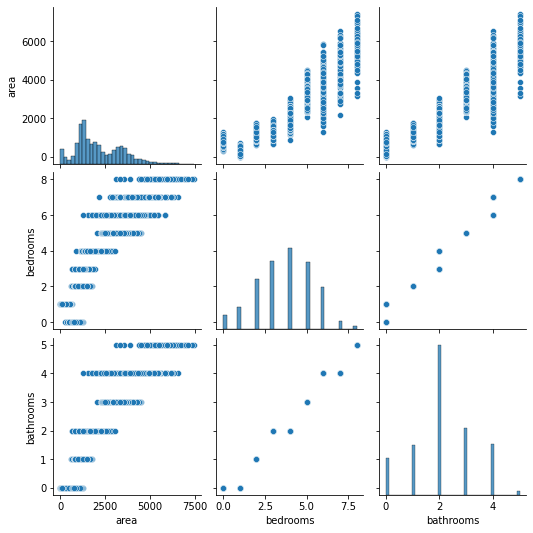

In [13]:
import seaborn as sb

sb.pairplot(df[['area', 'bedrooms', 'bathrooms']]);

# can expect a positive relationship between each variable and price (y)

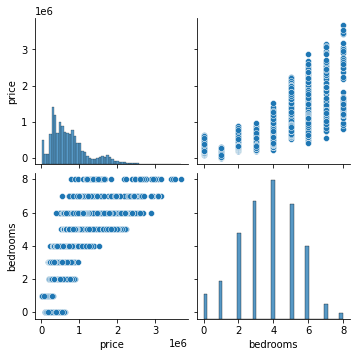

In [14]:
sb.pairplot(df[['price', 'bedrooms']]);

# but bedroom has negative coefficient in MLR (-2925) --> could be due to multicollinearity 

In [20]:
# can also use VIFs to look at multicollinearity

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
y, X = dmatrices('price ~ area + bedrooms + bathrooms', df, return_type = 'dataframe')

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns

vif

# would want to remove bedrooms or bathrooms as VIF is > 10

,VIF Factor,features
0,7.327102,Intercept
1,5.458190,area
2,20.854484,bedrooms
3,19.006851,bathrooms


In [24]:
# Higher Order Terms

df['bedrooms_squared'] = df['bedrooms']*df['bedrooms']

df['intercept'] = 1
lm = sm.OLS(df['price'], df[['intercept', 'bedrooms', 'bedrooms_squared']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     4199.
Date:                Sun, 23 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:38:33   Log-Likelihood:                -85302.
No. Observations:                6028   AIC:                         1.706e+05
Df Residuals:                    6025   BIC:                         1.706e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept         1.509e+05   1.58e+04      9.524      0.000     1.2e+05    1.82e+05
bedrooms          5.223e+04   8906.834      5.865      0.000    3.48e+04    6.97e+04
bedrooms_squared  2.446e+04   1184.538     20.647      0.000    2.21e+04    2.68e+04
==============================================================================
Omnibus:                      626.860   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              916.588
Skew:                           0.793   Prob(JB):                    9.23e-200
Kurtosis:                       4.064   Cond. No.                         87.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""